This Notebook is evaluating the NYC hourly ridership dataset for use as busyness data
The dataset can be found at https://data.ny.gov/Transportation/MTA-Subway-Hourly-Ridership-Beginning-February-202/wujg-7c2s

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240522.csv')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_20940\1196061115.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240522.csv')


In [3]:
# To save time as the dataset is large, keep a copy of the data in memory
# df2 = df.copy()

### Data Exploration and Evaluation

In [4]:
# Outputs # rows
print("Number of rows:", df.shape[0])
# Outputs # cols
print("Number of cols:", df.shape[1])

Number of rows: 57291332
Number of cols: 12


In [5]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,05/24/2023 06:00:00 AM,subway,61,50 St (D),Brooklyn,omny,OMNY - Full Fare,35,2,40.636261,-73.994789,POINT (-73.99478912353516 40.636260986328125)
1,03/20/2023 01:00:00 PM,subway,61,50 St (D),Brooklyn,omny,OMNY - Full Fare,29,2,40.636261,-73.994789,POINT (-73.99478912353516 40.636260986328125)
2,01/21/2023 01:00:00 PM,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Full Fare,636,9,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578)
3,05/24/2023 06:00:00 PM,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Fair Fare,149,0,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578)
4,06/29/2023 02:00:00 AM,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,metrocard,Metrocard - Fair Fare,3,0,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578)


In [6]:
df.dtypes

transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership                int64
transfers                int64
latitude               float64
longitude              float64
Georeference            object
dtype: object

In [7]:
# Convert to datetime
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])

In [8]:
# Convert all of the object cols to category
object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')

In [9]:
# Find duplicate rows
print("Number of duplicate rows:", df[df.duplicated()==True].shape[0])

# There are no duplicate rows

Number of duplicate rows: 0


In [10]:
# Check for null values in each column
print(df.isnull().sum())
# No missing values

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64


In [11]:
# TODO: REMOVE SUBSET PART HERE
# Taking subset to speed up code writing
df3 = df.sample(n=100000, random_state=0)

In [12]:
# Numeric
numeric_columns = df.select_dtypes(['int64', 'float64', 'datetime64']).columns

In [13]:
# Get cardinality of the numeric columns
numeric_columns_card = df[numeric_columns].nunique()
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
transit_timestamp,19891
ridership,7096
transfers,1032
latitude,926
longitude,927


In [14]:
# First describe the numeric features
df_table_numeric = df[numeric_columns].describe().T
df_table_numeric

,count,mean,min,25%,50%,75%,max,std
transit_timestamp,57291332,2023-03-28 02:23:39.360916736,2022-02-01 00:00:00,2022-09-02 19:00:00,2023-03-31 02:00:00,2023-10-21 14:00:00,2024-05-09 23:00:00,NaN
ridership,57291332.0,44.194172,1.0,4.0,12.0,35.0,14243.0,142.053608
transfers,57291332.0,1.858004,0.0,0.0,0.0,1.0,1242.0,11.523553
latitude,57291332.0,40.732297,40.576126,40.677315,40.724331,40.791641,40.903126,0.078356
longitude,57291332.0,-73.935163,-74.07484,-73.981232,-73.947479,-73.89948,-73.7554,0.056157


In [15]:
# Add % missing
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
transit_timestamp,0.0
ridership,0.0
transfers,0.0
latitude,0.0
longitude,0.0


In [16]:
category_columns = df.select_dtypes(['category']).columns

In [17]:
df[category_columns].nunique()

transit_mode             3
station_complex_id     854
station_complex        428
borough                  5
payment_method           2
fare_class_category     10
Georeference           976
dtype: int64

In [18]:
# Change category cols to remove 
# Look at the values taken by each categorical feature, as a proportion, including NaN
for column in category_columns:
    # print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))

transit_mode
subway                   0.992327
staten_island_railway    0.003890
tram                     0.003783
Name: proportion, dtype: float64
station_complex_id
225    2.438676e-03
98     2.424730e-03
99     2.254477e-03
97     2.092254e-03
1      1.969041e-03
           ...     
199    3.549577e-04
202    3.336107e-04
225    2.283766e-04
98     3.490929e-08
99     3.490929e-08
Name: proportion, Length: 854, dtype: float64
station_complex
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)      0.002920
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)    0.002892
Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)          0.002878
Grand Central-42 St (S,4,5,6,7)                       0.002852
34 St-Penn Station (1,2,3)                            0.002836
                                                        ...   
Aqueduct-N Conduit Av (A)                             0.001543
Tompkinsville (SIR)                                   0.001387
Beach 98 St (A,S)                              

array([[<Axes: title={'center': 'transit_timestamp'}>,
        <Axes: title={'center': 'ridership'}>],
       [<Axes: title={'center': 'transfers'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>, <Axes: >]], dtype=object)

<Figure size 640x480 with 0 Axes>

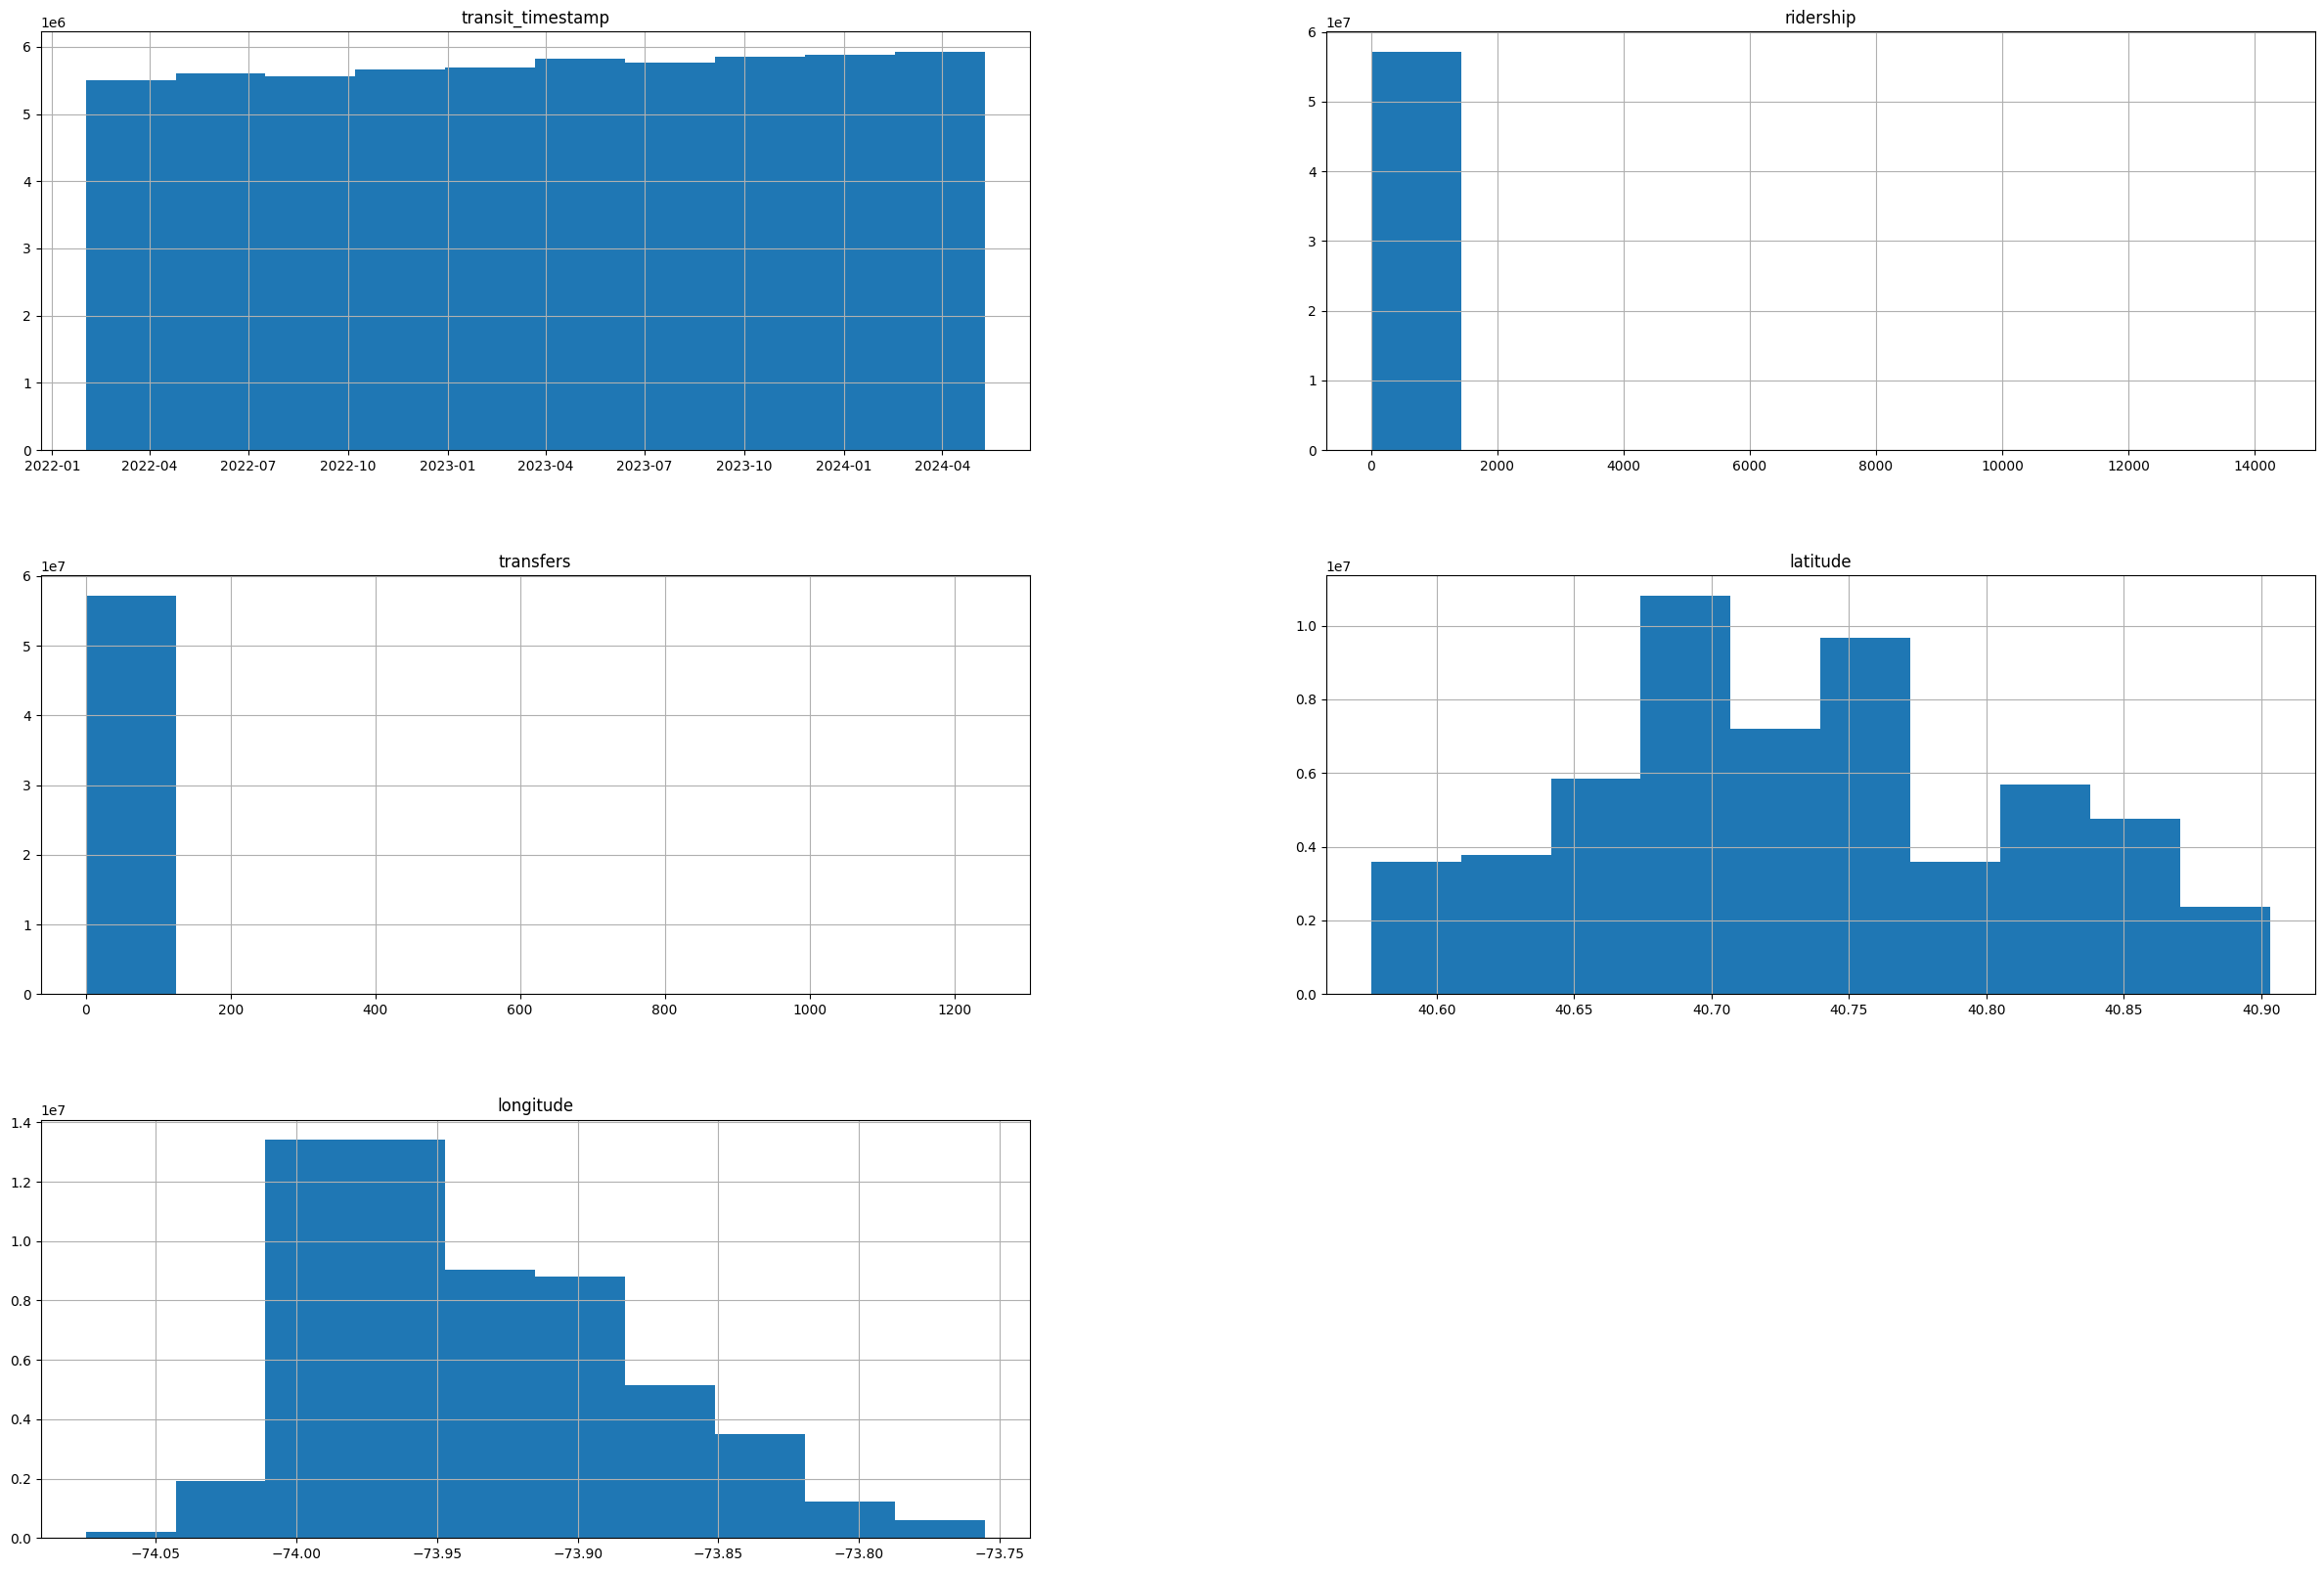

In [19]:
# Plot them all together instead
plt.figure()
df.hist(figsize=(30, 20))


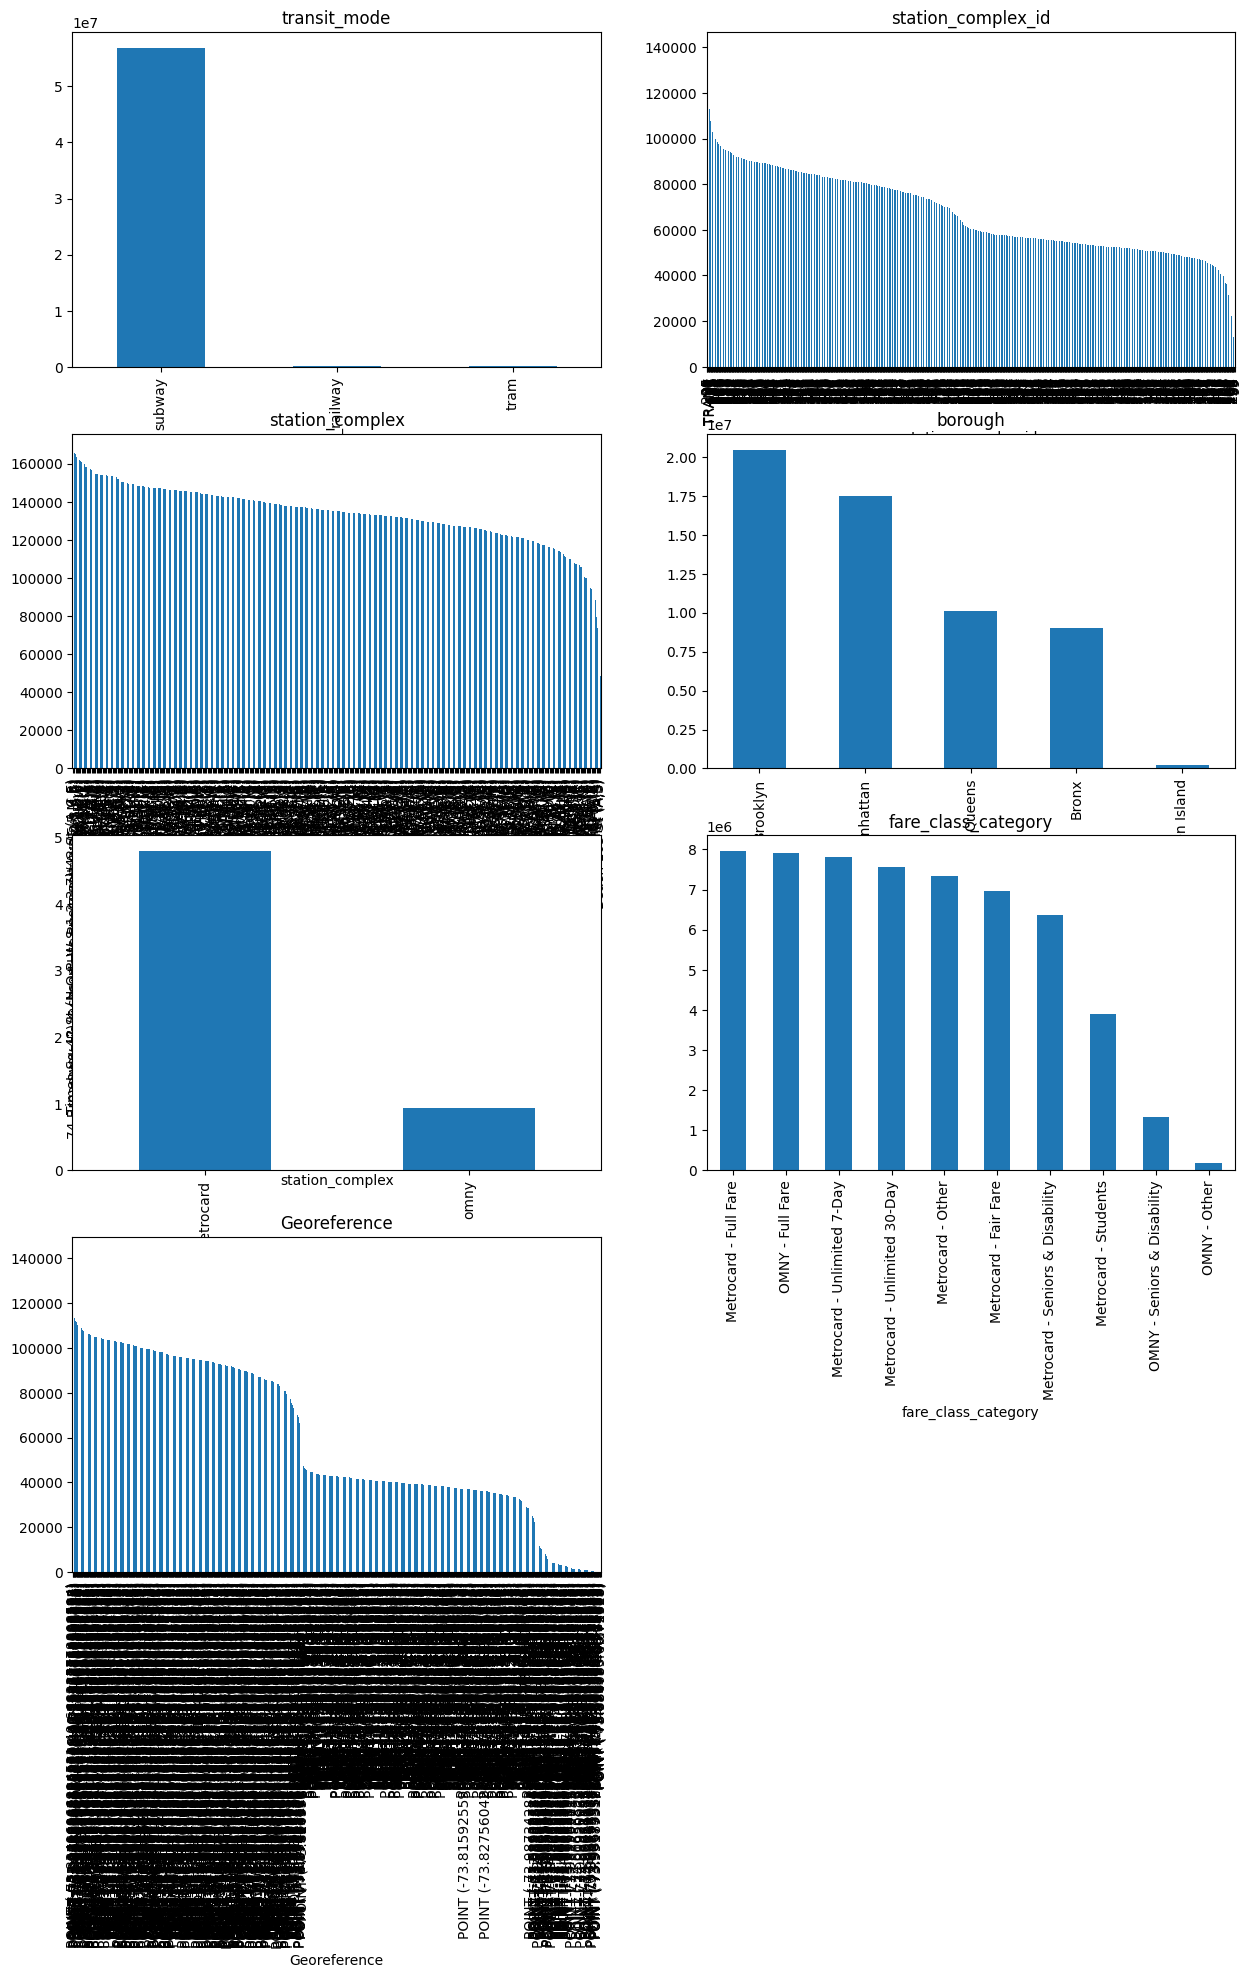

In [20]:
# Plot categoric columns
num_rows = (len(category_columns) + 1) // 2

# Create a single figure with subplots arranged in a 2-column grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column
for i, column in enumerate(category_columns):
    # Plot each bar plot on its corresponding subplot
    df[column].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)

for j in range(len(category_columns), num_rows * 2):
    fig.delaxes(axes[j])

plt.show()


In [21]:
# Look once again at the summary stats table for categorical features
df_table_categoric = df[category_columns].describe().T
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
# cardinality
category_columns_card = df[category_columns].nunique()
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])

In [22]:
second_val = []
second_freq = []
for category in category_columns:
    # print(df[category].value_counts().index.tolist())
    second_val.append(df[category].value_counts().index.tolist()[1])
    second_freq.append(df[category].value_counts().iloc[1])

In [23]:
# Concatenate numeric, missing and cardinality cols
df_categoric_columns_data_quality_report_table = pd.concat([df_table_categoric, df_category_perc_missing, df_category_card], axis=1)

df_categoric_columns_data_quality_report_table['second'] = second_val
df_categoric_columns_data_quality_report_table['second_freq'] = second_freq

df_categoric_columns_data_quality_report_table = df_categoric_columns_data_quality_report_table[['count', 'unique', 'top', 'freq', 'second', 'second_freq', '%missing', 'card']]
# Print data quality report table for numeric features to a file.
df_categoric_columns_data_quality_report_table.to_csv("Subway-DataQualityReport-CategoricFeatures-Table.csv", 
                                         index_label='Feature')
df_categoric_columns_data_quality_report_table

,count,unique,top,freq,second,second_freq,%missing,card
transit_mode,57291332,3,subway,56851724,staten_island_railway,222855,0.0,3
station_complex_id,57291332,854,225,139715,98,138916,0.0,854
station_complex,57291332,428,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",167286,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",165697,0.0,428
borough,57291332,5,Brooklyn,20454130,Manhattan,17492836,0.0,5
payment_method,57291332,2,metrocard,47880503,omny,9410829,0.0,2
fare_class_category,57291332,10,Metrocard - Full Fare,7950433,OMNY - Full Fare,7920107,0.0,10
Georeference,57291332,976,POINT (-73.83406066894531 40.668235778808594),142299,POINT (-73.97684478759766 40.75177764892578),116171,0.0,976


In [24]:
# Concatenate numeric, missing and cardinality cols
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.
df_numeric_columns_data_quality_report_table.to_csv("Subway-DataQualityReport-NumericFeatures-Table.csv", 
                                         index_label='Feature')
df_numeric_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,std,%missing,card
transit_timestamp,57291332,2023-03-28 02:23:39.360916736,2022-02-01 00:00:00,2022-09-02 19:00:00,2023-03-31 02:00:00,2023-10-21 14:00:00,2024-05-09 23:00:00,NaN,0.0,19891
ridership,57291332.0,44.194172,1.0,4.0,12.0,35.0,14243.0,142.053608,0.0,7096
transfers,57291332.0,1.858004,0.0,0.0,0.0,1.0,1242.0,11.523553,0.0,1032
latitude,57291332.0,40.732297,40.576126,40.677315,40.724331,40.791641,40.903126,0.078356,0.0,926
longitude,57291332.0,-73.935163,-74.07484,-73.981232,-73.947479,-73.89948,-73.7554,0.056157,0.0,927


### Logical Integrity Tests 
1. Timestamps are all after feb 2022 and before the upload date (22nd May)
2. Every timestamp-station_id combination has a row in the dataset

In [25]:
# Test 1
df['transit_timestamp'].min()

Timestamp('2022-02-01 00:00:00')

In [26]:
df['transit_timestamp'].max()

Timestamp('2024-05-09 23:00:00')

In [27]:
# Test 2
start_date = '2022-02-01'
end_date = '2024-05-09 23:00:00'
all_hours = pd.date_range(start=start_date, end=end_date, freq='h')

unique_station_ids = df['station_complex_id'].unique()

In [28]:
multi_index = pd.MultiIndex.from_product([all_hours, unique_station_ids], names=['transit_timestamp', 'station_complex_id'])

# Create a DataFrame with this MultiIndex
all_combinations = pd.DataFrame(index=multi_index).reset_index()

In [29]:
merged_df = pd.merge(all_combinations, df, on=['transit_timestamp', 'station_complex_id'], how='left', indicator=True)

In [35]:
merged_df.shape

(65910871, 13)

In [34]:
merged_df[merged_df['_merge']=='left_only'].shape

(8619539, 13)

Dataset Cleanup:

Missing Data:
Every station_complex transit_timestamp combination should have at least 1 row. If not create new row and make ridership = 0

In [30]:
timestamps = df['transit_timestamp'].unique()
timestamps

<DatetimeArray>
['2023-05-24 06:00:00', '2023-03-20 13:00:00', '2023-01-21 13:00:00',
 '2023-05-24 18:00:00', '2023-06-29 02:00:00', '2023-01-21 14:00:00',
 '2023-11-08 09:00:00', '2024-01-31 06:00:00', '2023-05-20 14:00:00',
 '2023-06-08 17:00:00',
 ...
 '2022-12-31 23:00:00', '2022-12-31 15:00:00', '2022-12-31 11:00:00',
 '2022-12-31 07:00:00', '2022-12-31 21:00:00', '2022-12-31 20:00:00',
 '2022-12-31 22:00:00', '2022-12-31 09:00:00', '2022-12-31 02:00:00',
 '2022-12-31 05:00:00']
Length: 19891, dtype: datetime64[ns]